<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" />
    
    
### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:** Kaleb Azael Avila Padilla, Flavio Maximiliano Herrada Avalos.

**Fecha:** 10 de Marzo de 2024.

**Expediente** : 724405.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**:https://github.com/KalebAvila/ProyectoEnConjunto_KAAavila_FMHerrada

# Tarea5: Clase 13

## Tarea

> Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset


Código de solución estudiante 1

In [1]:
# Código de solución estudiante 1
# Paqueterías necesarias
import numpy as np
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Conv1D, MaxPooling1D, concatenate
from keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
# Verificar NaN en cada columna
for columna in data.columns:
    cantidad_nan = data[columna].isna().sum()
    print(f'La columna {columna} tiene {cantidad_nan} valores NaN.')

La columna price tiene 0 valores NaN.
La columna area tiene 0 valores NaN.
La columna bedrooms tiene 0 valores NaN.
La columna bathrooms tiene 0 valores NaN.
La columna stories tiene 0 valores NaN.
La columna mainroad tiene 0 valores NaN.
La columna guestroom tiene 0 valores NaN.
La columna basement tiene 0 valores NaN.
La columna hotwaterheating tiene 0 valores NaN.
La columna airconditioning tiene 0 valores NaN.
La columna parking tiene 0 valores NaN.
La columna prefarea tiene 0 valores NaN.
La columna furnishingstatus tiene 0 valores NaN.


In [4]:
# Obtener el tipo de cada variable
for columna, tipo in data.dtypes.items():
    print(f'La columna {columna} tiene el tipo {tipo}.')

La columna price tiene el tipo int64.
La columna area tiene el tipo int64.
La columna bedrooms tiene el tipo int64.
La columna bathrooms tiene el tipo int64.
La columna stories tiene el tipo int64.
La columna mainroad tiene el tipo object.
La columna guestroom tiene el tipo object.
La columna basement tiene el tipo object.
La columna hotwaterheating tiene el tipo object.
La columna airconditioning tiene el tipo object.
La columna parking tiene el tipo int64.
La columna prefarea tiene el tipo object.
La columna furnishingstatus tiene el tipo object.


In [5]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a todas las variables categóricas
for columna in data.columns:
    if data[columna].dtype == 'object':  # Solo aplicar LabelEncoder si la columna contiene texto
        data[columna] = label_encoder.fit_transform(data[columna])

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [6]:
# Obtener el tipo de cada variable
for columna, tipo in data.dtypes.items():
    print(f'La columna {columna} tiene el tipo {tipo}.')

La columna price tiene el tipo int64.
La columna area tiene el tipo int64.
La columna bedrooms tiene el tipo int64.
La columna bathrooms tiene el tipo int64.
La columna stories tiene el tipo int64.
La columna mainroad tiene el tipo int64.
La columna guestroom tiene el tipo int64.
La columna basement tiene el tipo int64.
La columna hotwaterheating tiene el tipo int64.
La columna airconditioning tiene el tipo int64.
La columna parking tiene el tipo int64.
La columna prefarea tiene el tipo int64.
La columna furnishingstatus tiene el tipo int64.


# 1. Modelos CNN univariados

In [7]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [8]:
# Definir la secuencia de entrada
raw_seq = data['price']
# Elegir un número de pasos de tiempo
n_steps = 3
# Número de características de mis datos
n_features = 1
# Dividir en muestras
X, y = split_univariate_sequence(raw_seq, n_steps)

print('X', X, 'y', y, sep='\n')

X
[[13300000 12250000 12250000]
 [12250000 12250000 12215000]
 [12250000 12215000 11410000]
 ...
 [ 1855000  1820000  1767150]
 [ 1820000  1767150  1750000]
 [ 1767150  1750000  1750000]]
y
[12215000 11410000 10850000 10150000 10150000  9870000  9800000  9800000
  9681000  9310000  9240000  9240000  9100000  9100000  8960000  8890000
  8855000  8750000  8680000  8645000  8645000  8575000  8540000  8463000
  8400000  8400000  8400000  8400000  8400000  8295000  8190000  8120000
  8080940  8043000  7980000  7962500  7910000  7875000  7840000  7700000
  7700000  7560000  7560000  7525000  7490000  7455000  7420000  7420000
  7420000  7350000  7350000  7350000  7350000  7343000  7245000  7210000
  7210000  7140000  7070000  7070000  7035000  7000000  6930000  6930000
  6895000  6860000  6790000  6790000  6755000  6720000  6685000  6650000
  6650000  6650000  6650000  6650000  6650000  6629000  6615000  6615000
  6580000  6510000  6510000  6510000  6475000  6475000  6440000  6440000
  64190

In [9]:
# Definimos nuestro modelo
model_1 = Sequential()
model_1.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_1.add(MaxPooling1D())
model_1.add(Flatten())
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3493 (13.64 KB)
Trainable params: 3493 (13.64 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [10]:
X.shape

(542, 3)

In [11]:
# reshape de [samples, timesteps] a [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features))
X

array([[[13300000],
        [12250000],
        [12250000]],

       [[12250000],
        [12250000],
        [12215000]],

       [[12250000],
        [12215000],
        [11410000]],

       ...,

       [[ 1855000],
        [ 1820000],
        [ 1767150]],

       [[ 1820000],
        [ 1767150],
        [ 1750000]],

       [[ 1767150],
        [ 1750000],
        [ 1750000]]])

In [12]:
y.shape

(542,)

In [13]:
# Ajustamos el modelo anterior
history_1 = model_1.fit(X, y, epochs=50, verbose=False)

<Axes: >

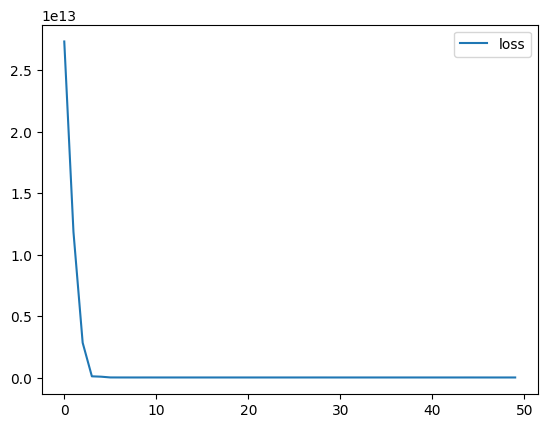

In [14]:
# Visualizar la historia del entrenamiento
pd.DataFrame(history_1.history).plot()

In [15]:
# Probamos nuestro modelo
x_input = np.array([100, 200, 300])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model_1.predict(x_input, verbose=0)
yhat

array([[251.92345]], dtype=float32)

# 2.2 Multiples series paralelas

In [16]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

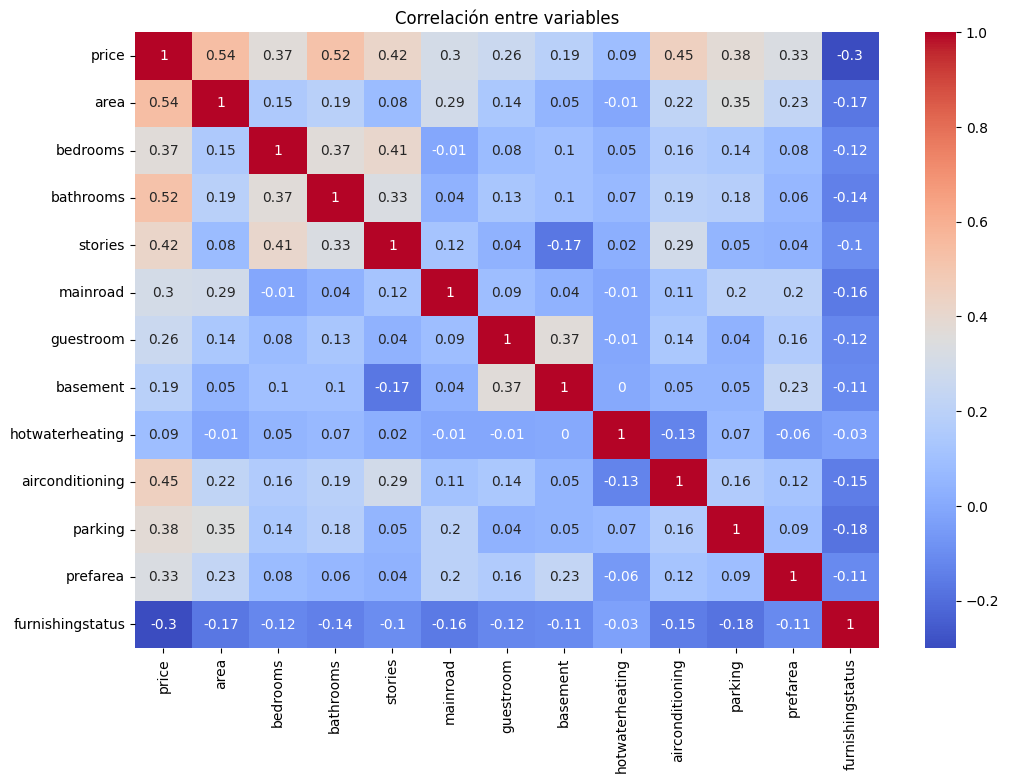

In [17]:
# Correlación entre variables
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

In [18]:
input_data = data[['area', 'bathrooms', 'price']].values

# Dividir en muestras
X, y = split_multiple_forecasting_sequence(input_data, n_steps)

print('X', X, 'y', y, sep='\n')

X
[[[    7420        2 13300000]
  [    8960        4 12250000]
  [    9960        2 12250000]]

 [[    8960        4 12250000]
  [    9960        2 12250000]
  [    7500        2 12215000]]

 [[    9960        2 12250000]
  [    7500        2 12215000]
  [    7420        1 11410000]]

 ...

 [[    2990        1  1855000]
  [    3000        1  1820000]
  [    2400        1  1767150]]

 [[    3000        1  1820000]
  [    2400        1  1767150]
  [    3620        1  1750000]]

 [[    2400        1  1767150]
  [    3620        1  1750000]
  [    2910        1  1750000]]]
y
[[    7500        2 12215000]
 [    7420        1 11410000]
 [    7500        3 10850000]
 ...
 [    3620        1  1750000]
 [    2910        1  1750000]
 [    3850        1  1750000]]


In [19]:
n_steps, X.shape[2]

(3, 3)

In [20]:
# Número de características de los datos (se excluye la columna de salida 'price')
n_features = X.shape[2]

In [21]:
# Definir el modelo
model_3 = Sequential()
model_3.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps, n_features)))
model_3.add(MaxPooling1D())
model_3.add(Flatten())
model_3.add(Dense(50, activation='relu'))
model_3.add(Dense(1))
model_3.compile(optimizer='adam', loss='mse')
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2, 64)             448       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3749 (14.64 KB)
Trainable params: 3749 (14.64 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [22]:
# Entrenar el modelo
history_3 = model_3.fit(X, y, epochs=50, verbose=False)

<Axes: >

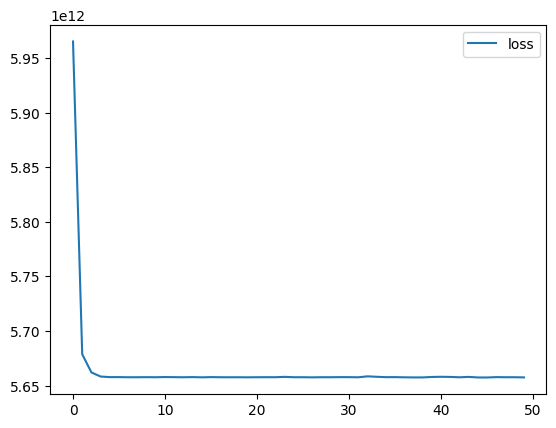

In [23]:
# Visualizar la historia del entrenamiento
pd.DataFrame(history_3.history).plot()

In [24]:
# Probamos nuestro modelo
x_input = np.array([[8960, 4, 13300000], [9960, 2, 12250000], [7500, 2, 12215000]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model_3.predict(x_input, verbose=0)
yhat

array([[4145227.5]], dtype=float32)

# 2.1 Modelo CNN con múltiples encabezamientos

In [7]:
# Una serie de tiempo por submodelo
n_features = 1
n_steps = 3

# Primer modelo de entrada
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

# Segundo modelo de entrada
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

# merge modelos de entrada
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

# Conectar entradas y salida del modelo
model_2 = Model(inputs=[visible1, visible2], outputs=output)

model_2.compile(optimizer='adam', loss='mse')

model_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3, 1)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 3, 1)]               0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 2, 64)                192       ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 2, 64)                192       ['input_2[0][0]']             
                                                                                              

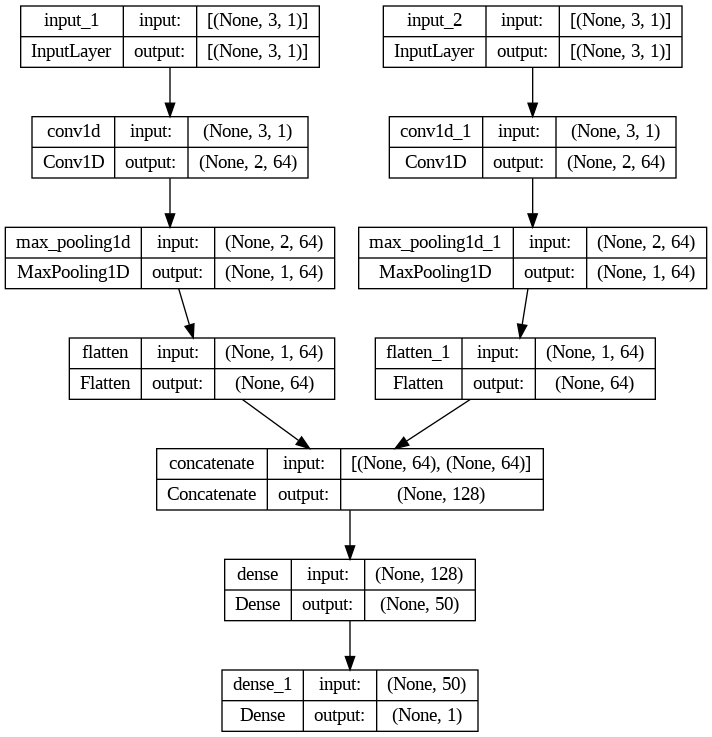

In [8]:
plot_model(model_2, to_file='model.png', show_shapes=True, show_layer_names=True)

In [9]:
X1 = data.drop('price', axis=1).iloc[:, :5]
X2 = data.drop('price', axis=1).iloc[:, 5:]
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X1 = tf.convert_to_tensor(X1.values.reshape(X1.shape[0], X1.shape[1], 1), dtype=tf.float32)
X2 = tf.convert_to_tensor(X2.values.reshape(X2.shape[0], X2.shape[1], 1), dtype=tf.float32)

n_steps = X1.shape[1]
n_features = 1

# Definimos el modelo
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

model_2_1 = Model(inputs=[visible1, visible2], outputs=output)


In [10]:
model_2_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 5, 1)]               0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 5, 1)]               0         []                            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 4, 64)                192       ['input_3[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 4, 64)                192       ['input_4[0][0]']             
                                                                                            

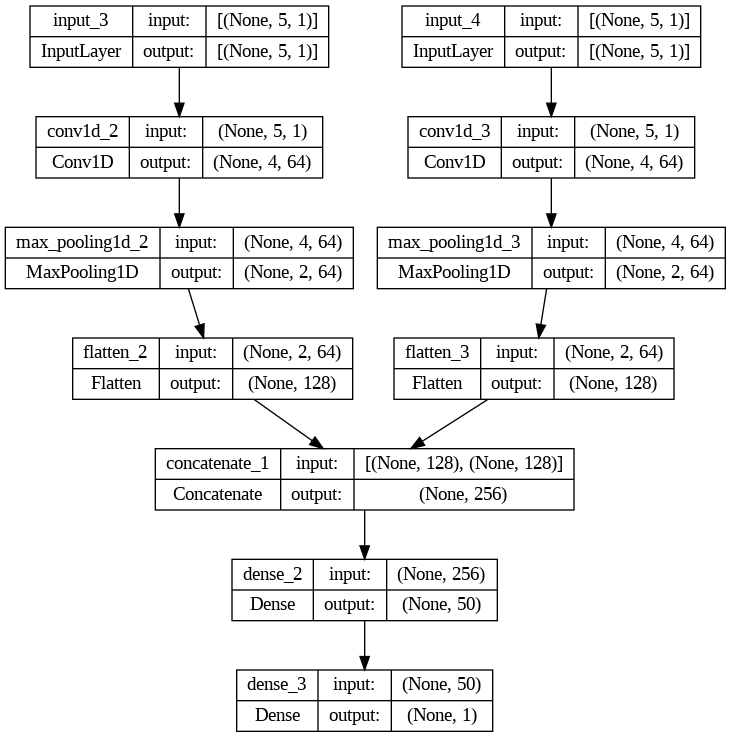

In [11]:
plot_model(model_2_1, to_file='model2_1.png', show_shapes=True, show_layer_names=True)

In [12]:
X1.shape

TensorShape([545, 5, 1])

In [13]:
model_2_1.compile(optimizer='adam', loss='mse')

# Entrenamos el modelo
history_2 = model_2_1.fit([X1, X2], y, epochs=50, verbose=0)

# Graficamos el historial de entrenamiento
pd.DataFrame(history_2.history).plot()

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 1 of layer "model_1" is incompatible with the layer: expected shape=(None, 5, 1), found shape=(None, 7, 1)


In [ ]:
# demonstrate prediction
x_input = np.array([[80, 85], [90, 95], [100, 105]])
x1 = x_input[:, 0].reshape((1, n_steps, n_features))
x2 = x_input[:, 1].reshape((1, n_steps, n_features))
yhat = model_2_1.predict([x1, x2], verbose=0)
print(yhat)

# Multi-output CNN Model

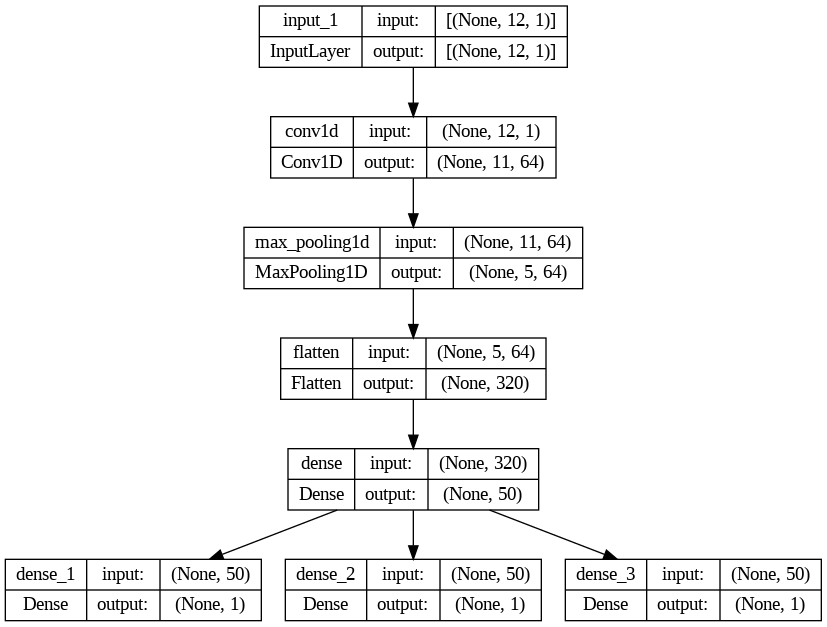

In [7]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = X.values.reshape(X.shape[0], X.shape[1], 1)

# Definimos el número de pasos y características
n_steps = X.shape[1]
n_features = X.shape[2]

# Definimos el modelo
visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

# Definimos salida 1
output1 = Dense(1)(cnn)
# Definimos salida 2
output2 = Dense(1)(cnn)
# Definimos salida 3
output3 = Dense(1)(cnn)

# Ponemos todo junto
model_4 = Model(inputs=visible, outputs=[output1, output2, output3])
model_4.compile(optimizer='adam', loss='mse')
plot_model(model_4, show_shapes=True, show_layer_names=True)

<Axes: >

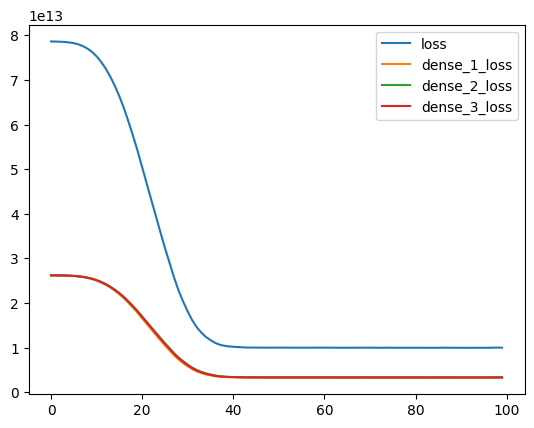

In [8]:
# Entrenamos el modelo
history_4 = model_4.fit(X, [y, y, y], epochs=100, verbose=0)

# Graficamos el historial de entrenamiento
pd.DataFrame(history_4.history).plot()

# 3.1 Serie temporal univariada

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 11, 64)            192       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                16050     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 16293 (63.64 KB)
Trainable params: 16293 (63.64 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

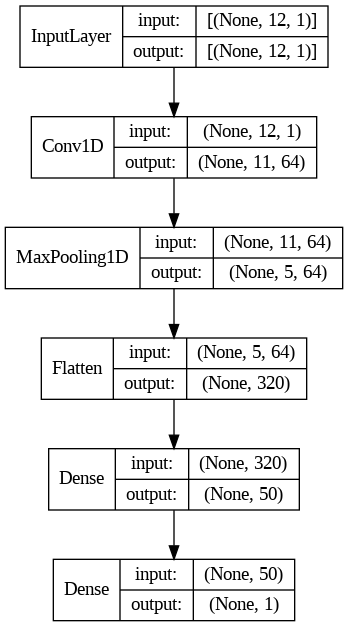

In [9]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = X.values.reshape(X.shape[0], X.shape[1], 1)

# Definimos el número de pasos y características
n_steps_in, n_steps_out = X.shape[1], 1
n_features = X.shape[2]

# Definimos el modelo
model_5 = Sequential()
model_5.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_5.add(MaxPooling1D())
model_5.add(Flatten())
model_5.add(Dense(50, activation='relu'))
model_5.add(Dense(n_steps_out))
model_5.compile(optimizer='adam', loss='mse')

model_5.summary()

plot_model(model_5, show_layer_names=False, show_shapes=True,)

<Axes: >

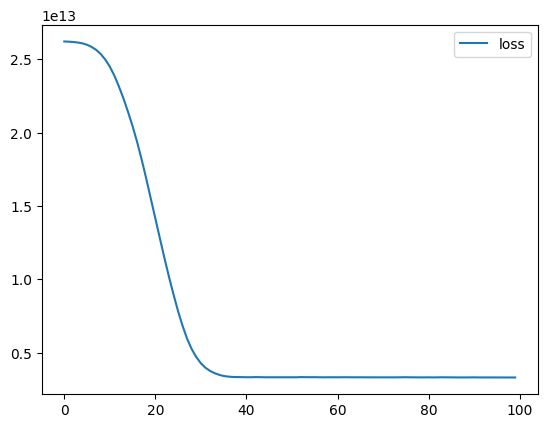

In [10]:
# Entrenamos el modelo
history_5 = model_5.fit(X, y, epochs=100, verbose=0)

# Graficamos el historial de entrenamiento
pd.DataFrame(history_5.history).plot()

# 3.2 Serie temporal multivariada

In [7]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = X.values.reshape(X.shape[0], X.shape[1], 1)

# Definimos el número de pasos y características
n_steps_in, n_steps_out = X.shape[1], 1
n_features = X.shape[2]

# Definimos el modelo
model_6 = Sequential()
model_6.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_6.add(MaxPooling1D())
model_6.add(Flatten())
model_6.add(Dense(50, activation='relu'))
model_6.add(Dense(n_steps_out))
model_6.compile(optimizer='adam', loss='mse')
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 50)                16050     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 16293 (63.64 KB)
Trainable params: 16293 (63.64 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

<Axes: >

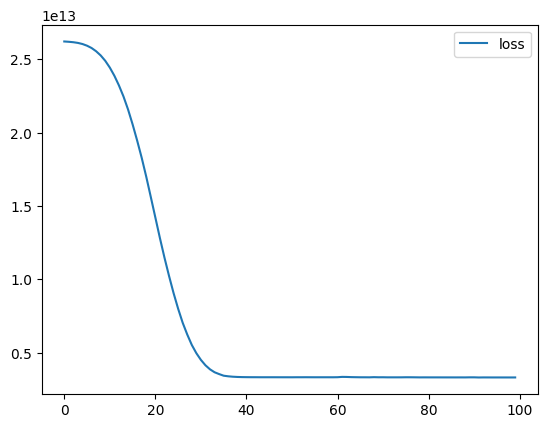

In [8]:
# Entrenamos el modelo
history_6 = model_6.fit(X, y, epochs=100, verbose=0)

# Graficamos el historial de entrenamiento
pd.DataFrame(history_6.history).plot()

# 3.3 Serie temporal multivariada predicción múltiple de cada entrada

In [9]:
X = data.drop('price', axis=1)
y = data['price']

# Reajustamos las entradas para que sean compatibles con el modelo
X = X.values.reshape(X.shape[0], X.shape[1], 1)

# Definimos el número de pasos y características
n_steps_in, n_steps_out = X.shape[1], 1
n_features = X.shape[2]

# Definimos el modelo
model_7 = Sequential()
model_7.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model_7.add(MaxPooling1D())
model_7.add(Flatten())
model_7.add(Dense(50, activation='relu'))
model_7.add(Dense(n_steps_out))
model_7.compile(optimizer='adam', loss='mse')
model_7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 11, 64)            192       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                16050     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 16293 (63.64 KB)
Trainable params: 16293 (63.64 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

<Axes: >

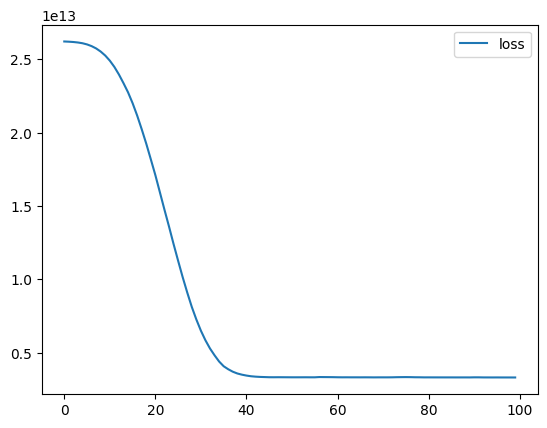

In [10]:
# Entrenamos el modelo
history_7 = model_7.fit(X, y, epochs=100, verbose=0)

# Graficamos el historial de entrenamiento
pd.DataFrame(history_7.history).plot()

Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.
